# ntp-atlas-pcap

* So Marco Davids found another bug with [Atlas NTP  measurements](https://mailman.ripe.net/archives/list/ripe-atlas@ripe.net/thread/33KNP7KPXN3YKUSEFTQGJMKVEHJAKX3Q/)
* IN short: most probes do not report results against his server
* He collected some pcap from a measurement
* I'll compare it here to see if they match


###  update 2025-07-14

* I suspect it's data sanitation on Atlas side



In [1]:
# First, we get atlas results from a measurement he ran:
#now let's get the ripe atlas measurements
import requests

#let's get measurements reported by Marco Davids on 

url = "https://atlas.ripe.net/api/v2/measurements/117140385/results/?format=json"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise exception for HTTP errors
    data_atlas = response.json()       # Parse JSON into a Python dict
    print(f"Downloaded {len(data_atlas)} records.")
except requests.RequestException as e:
    print(f"Error downloading data: {e}")

# 'data' now contains the JSON response as a Python dictionary/list


Downloaded 1 records.


In [2]:
# as can be seen, there is only one response in this
# however, the web site of the measurement has 50 probes
data_atlas

[{'fw': 5090,
  'mver': '2.6.4',
  'lts': 7,
  'dst_name': 'ntp0.testdns.nl',
  'ttr': 378.727243,
  'dst_addr': '141.105.125.85',
  'src_addr': '45.142.246.158',
  'proto': 'UDP',
  'af': 4,
  'li': 'no',
  'version': 4,
  'mode': 'server',
  'stratum': 1,
  'poll': 1024,
  'precision': 1.86265e-09,
  'root-delay': 0,
  'root-dispersion': 1.52588e-05,
  'ref-id': 'XFUN',
  'ref-ts': 3961208152.9128127,
  'result': [{'origin-ts': 3961208212.893019,
    'receive-ts': 3961208212.9098125,
    'transmit-ts': 3961208212.9128127,
    'final-ts': 3961208212.931933,
    'rtt': 0.035914,
    'offset': 0.001163},
   {'precision': 1.49012e-08,
    'ref-ts': 3961208152.951699,
    'origin-ts': 3961208212.931956,
    'receive-ts': 3961208212.9466987,
    'transmit-ts': 3961208212.951699,
    'final-ts': 3961208212.971092,
    'rtt': 0.034136,
    'offset': 0.002325},
   {'precision': 2.98023e-08,
    'ref-ts': 3961208152.9931803,
    'origin-ts': 3961208212.973435,
    'receive-ts': 3961208212.9911

In [3]:
# so which probes were used? 



# Replace with your actual measurement ID
measurement_id = 1234567

# API endpoint with optional fields
url = f"https://atlas.ripe.net/api/v2/measurements/117140385/?optional_fields=probes"

# Make the request
response = requests.get(url)
data = response.json()

# Extract probe IDs and store in a set
probe_ids = {probe["id"] for probe in data.get("probes", [])}

# Output the result
print(f"Number of unique probes: {len(probe_ids)}")
print(probe_ids)


Number of unique probes: 50
{12163, 1007620, 55817, 1006605, 1006606, 53390, 60049, 1008530, 660, 62589, 51350, 1003161, 1004827, 1006239, 1004704, 7072, 17441, 1010855, 50350, 13745, 54580, 29239, 1009593, 1010876, 1004862, 51007, 53953, 1003331, 22084, 1004746, 10443, 18891, 1007439, 62037, 1010904, 60123, 3804, 29793, 3811, 1009253, 55653, 10986, 61168, 1003762, 14194, 52980, 19832, 6905, 61820, 21373}


In [4]:
# let's now get metadata about these probes
import requests
import time

# Dict to store metadata
probe_metadata = {}

# Loop through probe IDs
for probe_id in probe_ids:
    url = f"https://atlas.ripe.net/api/v2/probes/{probe_id}/"
    response = requests.get(url)
    if response.status_code == 200:
        probe_metadata[probe_id] = response.json()
    else:
        print(f"Failed to fetch probe {probe_id}: HTTP {response.status_code}")
    time.sleep(0.1)  # Sleep to avoid hitting rate limits

# Print example output
for pid, meta in probe_metadata.items():
    print(f"{pid}: {meta.get('country_code')}, ASN: {meta.get('asn_v4')}")


12163: SG, ASN: 41095
1007620: NL, ASN: 12859
55817: SE, ASN: 8473
1006605: ME, ASN: 8585
1006606: BE, ASN: 57225
53390: US, ASN: 7922
60049: BR, ASN: 52863
1008530: GB, ASN: 2856
660: ES, ASN: 57269
62589: AR, ASN: 3549
51350: US, ASN: 22773
1003161: US, ASN: 10796
1004827: US, ASN: 46375
1006239: CL, ASN: 270024
1004704: US, ASN: 53698
7072: RU, ASN: 57578
17441: SE, ASN: 50821
1010855: US, ASN: 22442
50350: NL, ASN: 41153
13745: BE, ASN: 6848
54580: RU, ASN: 29124
29239: FR, ASN: 12322
1009593: NL, ASN: 50266
1010876: US, ASN: 20473
1004862: US, ASN: 26370
51007: GR, ASN: 3329
53953: US, ASN: 32890
1003331: DE, ASN: 31898
22084: NL, ASN: 50266
1004746: RS, ASN: 25431
10443: US, ASN: 13977
18891: NZ, ASN: 56030
1007439: IT, ASN: 202613
62037: US, ASN: 701
1010904: BG, ASN: 26383
60123: AT, ASN: 1853
3804: RU, ASN: 28738
29793: DK, ASN: 216275
3811: RU, ASN: 42610
1009253: CN, ASN: 9808
55653: BE, ASN: 6848
10986: NL, ASN: 1103
61168: TW, ASN: 3462
1003762: NL, ASN: 50266
14194: DE, A

In [81]:
#now let's make an probe_id iP-address dict
ip_probe_id=dict()

for p, values in probe_metadata.items():
    ip_probe_id[values['address_v4']]=p

In [85]:
ip_probe_id

{'103.242.74.213': 12163,
 '213.136.26.43': 1007620,
 '85.24.232.250': 55817,
 '95.155.57.115': 1006605,
 '193.150.106.30': 1006606,
 '67.188.33.43': 53390,
 None: 10986,
 '86.128.46.71': 1008530,
 '190.216.95.53': 62589,
 '68.104.118.208': 51350,
 '74.140.111.161': 1003161,
 '23.93.27.73': 1004827,
 '200.39.138.190': 1006239,
 '23.152.192.43': 1004704,
 '45.142.246.158': 7072,
 '66.60.237.66': 1010855,
 '91.215.7.190': 50350,
 '94.224.11.87': 13745,
 '81.200.31.214': 54580,
 '82.66.187.120': 29239,
 '178.226.252.165': 1009593,
 '137.220.60.24': 1010876,
 '130.51.193.230': 1004862,
 '206.174.163.52': 53953,
 '130.162.35.116': 1003331,
 '188.90.208.189': 22084,
 '217.24.20.4': 1004746,
 '70.20.54.168': 10443,
 '114.23.160.229': 18891,
 '217.198.140.2': 1007439,
 '100.4.110.245': 62037,
 '31.13.248.138': 1010904,
 '78.104.195.8': 60123,
 '78.153.134.4': 3804,
 '91.226.145.64': 29793,
 '46.242.12.248': 3811,
 '112.44.189.239': 1009253,
 '94.224.191.57': 55653,
 '61.228.77.37': 61168,
 '85

In [82]:
ip_probe_id

# Invert the dictionary
probe_id_ip = {v: k for k, v in ip_probe_id.items()}

print(probe_id_ip)

{12163: '103.242.74.213', 1007620: '213.136.26.43', 55817: '85.24.232.250', 1006605: '95.155.57.115', 1006606: '193.150.106.30', 53390: '67.188.33.43', 10986: None, 1008530: '86.128.46.71', 62589: '190.216.95.53', 51350: '68.104.118.208', 1003161: '74.140.111.161', 1004827: '23.93.27.73', 1006239: '200.39.138.190', 1004704: '23.152.192.43', 7072: '45.142.246.158', 1010855: '66.60.237.66', 50350: '91.215.7.190', 13745: '94.224.11.87', 54580: '81.200.31.214', 29239: '82.66.187.120', 1009593: '178.226.252.165', 1010876: '137.220.60.24', 1004862: '130.51.193.230', 53953: '206.174.163.52', 1003331: '130.162.35.116', 22084: '188.90.208.189', 1004746: '217.24.20.4', 10443: '70.20.54.168', 18891: '114.23.160.229', 1007439: '217.198.140.2', 62037: '100.4.110.245', 1010904: '31.13.248.138', 60123: '78.104.195.8', 3804: '78.153.134.4', 29793: '91.226.145.64', 3811: '46.242.12.248', 1009253: '112.44.189.239', 55653: '94.224.191.57', 61168: '61.228.77.37', 1003762: '85.146.98.97', 14194: '212.111.2

In [7]:
from scapy.all import rdpcap, UDP, IP
import struct

In [24]:
#now let' s look at the pcap collected by Marco on his server side
# this was done during the measurements ran by atlas
# it may have more clients than atlas only


In [30]:
import struct
from scapy.all import rdpcap, IP, UDP

NTP_PORT = 123
NTP_TIMESTAMP_ROUND = 6  # precision for safe float comparison

def get_ntp_timestamp(data: bytes, offset: int) -> float:
    """Extract 64-bit NTP timestamp starting at `offset` in payload."""
    if len(data) < offset + 8:
        return 0.0
    seconds, fraction = struct.unpack("!II", data[offset:offset+8])
    return seconds + fraction / 2**32

def parse_ntp_packets(pcap_path):
    packets = rdpcap(pcap_path)

    requests = {}
    matched = []
    unmatched_responses = []

    for pkt in packets:
        if pkt.haslayer(UDP) and pkt.haslayer(IP):
            udp = pkt[UDP]
            ip = pkt[IP]

            if udp.sport == NTP_PORT or udp.dport == NTP_PORT:
                payload = bytes(udp.payload)

                if len(payload) < 48:
                    continue  # malformed NTP packet

                src = ip.src
                dst = ip.dst

                if udp.dport == NTP_PORT:
                    # This is an NTP request
                    tx_ts = get_ntp_timestamp(payload, 40)  # Transmit timestamp
                    key = (src, dst, round(tx_ts, NTP_TIMESTAMP_ROUND), udp.sport)
                    requests[key] = {
                        "src": src,
                        "dst": dst,
                        "tx_ts": tx_ts,
                        "raw": payload,
                        "time": float(pkt.time),
                        "sport": udp.sport,
                        "dport": udp.dport,
                    }

                elif udp.sport == NTP_PORT:
                    # This is an NTP response
                    org_ts = get_ntp_timestamp(payload, 24)  # Originate timestamp
                    key = (dst, src, round(org_ts, NTP_TIMESTAMP_ROUND), udp.dport)
                    response = {
                        "src": src,
                        "dst": dst,
                        "org_ts": org_ts,
                        "raw": payload,
                        "time": float(pkt.time),
                        "sport": udp.sport,
                        "dport": udp.dport,
                    }
                    if key in requests:
                        matched.append({
                            "request": requests[key],
                            "response": response
                        })
                        del requests[key]
                    else:
                        unmatched_responses.append(response)

    return matched


In [87]:
reporting_probes=dict()
for k in data_atlas:
    #let's get the probe_ip_address
    probe_ip=( k['src_addr'])
    tempL=[]
    for m in ntp_matches:
        if probe_ip in m['request']['src']:
            tempL.append(m['request'])
        else:
            print('ip not found', probe_ip)
    reporting_probes[ip_probe_id[probe_ip]]=tempL
            

ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.246.158
ip not found 45.142.

In [88]:
reporting_probes

{7072: [{'src': '45.142.246.158',
   'dst': '141.105.125.85',
   'tx_ts': 3961208212.893019,
   'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x94\xe4\x9c\xe4\xa7',
   'time': Decimal('1752219412.912646344')},
  {'src': '45.142.246.158',
   'dst': '141.105.125.85',
   'tx_ts': 3961208212.931956,
   'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x94\xee\x94\xab\x1d',
   'time': Decimal('1752219412.951492593')},
  {'src': '45.142.246.158',
   'dst': '141.105.125.85',
   'tx_ts': 3961208212.973435,
   'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x94\xf93\tA',
   'time': Decimal('1752219412.992997945')}]}

In [65]:
# we see that there are 3 requests fromt his probe 
# on the pcap file, and they are also seen on data_atlas['result']
#see if they really match

#fisrst get the tx_ts fromthe pcaps and see if they are there
tx_times=[]
for probz,values in reporting_probes.items():
 
    #print(probz)
    for m_probes in values:

        tx_times.append(m_probes['tx_ts'])
    #now let' see if they match the data_atlas
tx_times

[3961208212.893019, 3961208212.931956, 3961208212.973435]

In [89]:
# double chekcing, to see if it they really match also in ip address and timestamp
# the origin-ts at atlas is the tx_time in the pcap

for k in data_atlas:
        #let's get the probe_ip_address
        probe_ip=( k['src_addr'])
        tempL=[]
        # only if the ip matches
        for m in ntp_matches:
            
            #match atlas probe ip with rqeuests seen at the ntp server
            if probe_ip in m['request']['src']:
                
                print(m['request'])
                for s in k['result']:
                   
                    if s['origin-ts'] ==   m['request']['tx_ts']:
                        print('match')
                
               

{'src': '45.142.246.158', 'dst': '141.105.125.85', 'tx_ts': 3961208212.893019, 'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x94\xe4\x9c\xe4\xa7', 'time': Decimal('1752219412.912646344')}
match
{'src': '45.142.246.158', 'dst': '141.105.125.85', 'tx_ts': 3961208212.931956, 'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x94\xee\x94\xab\x1d', 'time': Decimal('1752219412.951492593')}
match
{'src': '45.142.246.158', 'dst': '141.105.125.85', 'tx_ts': 3961208212.973435, 'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x94\xf93\tA', 'time': Decimal('1752219412.992997945')}
match


In [90]:
#now get all the queries from ip addresses from atlas probes seen on the pcap but not on atlas
missing=[]
missing_probe_id=dict()

for m in ntp_matches:
    if m['request']['src'] in ip_probe_id.keys()  and m['request']['src'] !='45.142.246.158':
        missing.append(m)
        temp_probe_id=ip_probe_id[ m['request']['src']]
        tempL=[]
        if temp_probe_id in missing_probe_id:
            tempL=missing_probe_id[temp_probe_id]
        tempL.append(m)
        missing_probe_id[temp_probe_id]=tempL
        

In [91]:
missing_probe_id

{6905: [{'request': {'src': '103.253.132.25',
    'dst': '141.105.125.85',
    'tx_ts': 3961208214.737752,
    'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x96\xbc\xddP\xa8',
    'time': Decimal('1752219414.831704783')},
   'response': {'src': '141.105.125.85',
    'dst': '103.253.132.25',
    'org_ts': 3961208214.737752,
    'raw': b'$\x01\x08\xe8\x00\x00\x00\x00\x00\x00\x00\x01XFUN\xec\x1b=Z\xd4\xf7\xfc\x9d\xec\x1b=\x96\xbc\xddP\xa8\xec\x1b=\x96\xd4t\xea/\xec\x1b=\x96\xd4\xf7\xfc\x9d',
    'time': Decimal('1752219414.831933074')}},
  {'request': {'src': '103.253.132.25',
    'dst': '141.105.125.85',
    'tx_ts': 3961208214.944847,
    'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x96\xf1\xe1~4',
    'time': Decimal('1752219415.

In [92]:
import json
from decimal import Decimal

def clean_for_json(obj):
    """Recursively convert bytes to hex strings and Decimals to floats."""
    if isinstance(obj, dict):
        return {k: clean_for_json(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [clean_for_json(i) for i in obj]
    elif isinstance(obj, bytes):
        return obj.hex()
    elif isinstance(obj, Decimal):
        return float(obj)
    else:
        return obj
    
    

In [129]:
# so we found data from 44 probes which had a request and response sent, but never shown in atlas

In [93]:

# Clean and save to JSON
cleaned_data = clean_for_json(missing_probe_id)

with open("missing_probe_id.json", "w") as f:
    json.dump(cleaned_data, f, indent=2)


In [38]:
!cat missing_probe_id.json

{
  "6905": [
    {
      "request": {
        "src": "103.253.132.25",
        "dst": "141.105.125.85",
        "tx_ts": 3961208214.737752,
        "raw": "23000000000000000000000000000000000000000000000000000000000000000000000000000000ec1b3d96bcdd50a8",
        "time": 1752219414.8317049
      },
      "response": {
        "src": "141.105.125.85",
        "dst": "103.253.132.25",
        "org_ts": 3961208214.737752,
        "raw": "240108e800000000000000015846554eec1b3d5ad4f7fc9dec1b3d96bcdd50a8ec1b3d96d474ea2fec1b3d96d4f7fc9d",
        "time": 1752219414.831933
      }
    },
    {
      "request": {
        "src": "103.253.132.25",
        "dst": "141.105.125.85",
        "tx_ts": 3961208214.944847,
        "raw": "23000000000000000000000000000000000000000000000000000000000000000000000000000000ec1b3d96f1e17e34",
        "time": 1752219415.0388045
      },
      "response": {
        "src": "141.105.125.85",
        "dst": "103.253.132.25",
        "org_ts": 3961208214.944847,
    

In [128]:
len(cleaned_data)
!git add missing_probe_id.json

In [94]:
missing_probe_id

{6905: [{'request': {'src': '103.253.132.25',
    'dst': '141.105.125.85',
    'tx_ts': 3961208214.737752,
    'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x96\xbc\xddP\xa8',
    'time': Decimal('1752219414.831704783')},
   'response': {'src': '141.105.125.85',
    'dst': '103.253.132.25',
    'org_ts': 3961208214.737752,
    'raw': b'$\x01\x08\xe8\x00\x00\x00\x00\x00\x00\x00\x01XFUN\xec\x1b=Z\xd4\xf7\xfc\x9d\xec\x1b=\x96\xbc\xddP\xa8\xec\x1b=\x96\xd4t\xea/\xec\x1b=\x96\xd4\xf7\xfc\x9d',
    'time': Decimal('1752219414.831933074')}},
  {'request': {'src': '103.253.132.25',
    'dst': '141.105.125.85',
    'tx_ts': 3961208214.944847,
    'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x96\xf1\xe1~4',
    'time': Decimal('1752219415.

In [102]:
missing_probe_id

{6905: [{'request': {'src': '103.253.132.25',
    'dst': '141.105.125.85',
    'tx_ts': 3961208214.737752,
    'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x96\xbc\xddP\xa8',
    'time': Decimal('1752219414.831704783')},
   'response': {'src': '141.105.125.85',
    'dst': '103.253.132.25',
    'org_ts': 3961208214.737752,
    'raw': b'$\x01\x08\xe8\x00\x00\x00\x00\x00\x00\x00\x01XFUN\xec\x1b=Z\xd4\xf7\xfc\x9d\xec\x1b=\x96\xbc\xddP\xa8\xec\x1b=\x96\xd4t\xea/\xec\x1b=\x96\xd4\xf7\xfc\x9d',
    'time': Decimal('1752219414.831933074')}},
  {'request': {'src': '103.253.132.25',
    'dst': '141.105.125.85',
    'tx_ts': 3961208214.944847,
    'raw': b'#\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x96\xf1\xe1~4',
    'time': Decimal('1752219415.

In [107]:
match

{'request': {'src': '108.214.236.114',
  'dst': '141.105.125.85',
  'tx_ts': 3961208213.600278,
  'raw': b'#\x01\x04\xef\x00\x00\x00\x00\x00\x00\x00\x00TEST\xec\x1b=\x95\x99\xab\xce\xfb\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xec\x1b=\x95\x99\xab\xce\xfb',
  'time': Decimal('1752219413.652629352')},
 'response': {'src': '141.105.125.85',
  'dst': '108.214.236.114',
  'org_ts': 3961208213.600278,
  'raw': b'$\x01\t\xec\x00\x00\x00\x00\x00\x00\x00\x01XFUN\xec\x1b=Y\xa7\x1f\x1b\x92\xec\x1b=\x95\x99\xab\xce\xfb\xec\x1b=\x95\xa6\x18\xf6\xb5\xec\x1b=\x95\xa7\x1f\x1b\x92',
  'time': Decimal('1752219413.652840804')}}

In [148]:
import pandas as pd
from datetime import datetime

NTP_UNIX_EPOCH_OFFSET = 2208988800  # seconds between 1900 and 1970

def ntp_to_utc(ntp_ts: float) -> datetime:
    """Convert NTP timestamp (seconds since 1900) to UTC datetime."""
    unix_ts = ntp_ts - NTP_UNIX_EPOCH_OFFSET
    return datetime.utcfromtimestamp(unix_ts)

data = []

for pb in missing_probe_id:

    for match in missing_probe_id[pb]:
        # Extract raw timestamps and source IP
        req_ntp = float(match["request"]["tx_ts"])
        req_capture = float(match["request"]["time"])
        resp_orig_ts = float(match["response"]["org_ts"])
        resp_capture = float(match["response"]["time"])
        src_ip = match["request"]["src"]

        # Convert NTP timestamps to UTC datetime
        req_ntp_time = ntp_to_utc(req_ntp)
        resp_orig_time = ntp_to_utc(resp_orig_ts)

        # Convert capture times (already Unix timestamps) to UTC datetime
        req_cap_time = datetime.utcfromtimestamp(req_capture)
        resp_cap_time = datetime.utcfromtimestamp(resp_capture)

        # Extract reference and transmit timestamps from response payload
        payload = match["response"]["raw"]
        ref_ts = float(get_ntp_timestamp(payload, 16))
        tx_ts = float(get_ntp_timestamp(payload, 40))
        ref_dt = ntp_to_utc(ref_ts)
        tx_dt = ntp_to_utc(tx_ts)

        # Validate reference timestamp is <= transmit timestamp
        valid_ref = ref_ts <= tx_ts

        # Calculate deltas (in seconds)
        resp_delta_capture = req_capture - (req_ntp - NTP_UNIX_EPOCH_OFFSET)
        resp_proc_time = (resp_cap_time - tx_dt  ).total_seconds()
        response_transmit_minus_reference = (tx_dt - ref_dt).total_seconds()

        # Check if request_ntp equals response_orig_ts
        request_ntp_equals_response_orig_ts = req_ntp_time == resp_orig_time

        # Lookup probe_id from ip_probe_id dict using source IP, default None if not found
        probe_id_raw = ip_probe_id.get(str(src_ip), None)
        probe_id = int(probe_id_raw) if probe_id_raw is not None else None
        if probe_id is None:
            print(src_ip)
            break

        # Append all data as a dict
        data.append({
            "probe_id": probe_id,
            "request_ntp": req_ntp_time,
            "request_capture": req_cap_time,
            "resp_delta_capture": resp_delta_capture,
            "response_orig_ts": resp_orig_time,
            "response_capture": resp_cap_time,
            "resp_proc_time": resp_proc_time,
            "response_reference_timestamp": ref_dt,
            "response_transmit_timestamp": tx_dt,
            "response_transmit_minus_reference": response_transmit_minus_reference,
            "response_reference_valid": valid_ref,
            "request_ntp_equals_response_orig_ts": request_ntp_equals_response_orig_ts
        })

# Create DataFrame and reorder columns
column_order = [
    "probe_id",
    "request_ntp",
    "request_capture",
    "resp_delta_capture",
    "response_orig_ts",
    "response_capture",
    "resp_proc_time",
    "response_reference_timestamp",
    "response_transmit_timestamp",
    "response_transmit_minus_reference",
    "response_reference_valid",
    "request_ntp_equals_response_orig_ts"
]

df = pd.DataFrame(data)[column_order]

print(df.head())


   probe_id                request_ntp            request_capture  \
0      6905 2025-07-11 07:36:54.737752 2025-07-11 07:36:54.831705   
1      6905 2025-07-11 07:36:54.944847 2025-07-11 07:36:55.038805   
2      6905 2025-07-11 07:36:55.167315 2025-07-11 07:36:55.261271   
3   1003331 2025-07-11 07:36:55.030792 2025-07-11 07:36:55.034399   
4   1003331 2025-07-11 07:36:55.039183 2025-07-11 07:36:55.042718   

   resp_delta_capture           response_orig_ts           response_capture  \
0            0.093953 2025-07-11 07:36:54.737752 2025-07-11 07:36:54.831933   
1            0.093957 2025-07-11 07:36:54.944847 2025-07-11 07:36:55.038979   
2            0.093956 2025-07-11 07:36:55.167315 2025-07-11 07:36:55.261452   
3            0.003606 2025-07-11 07:36:55.030792 2025-07-11 07:36:55.034638   
4            0.003535 2025-07-11 07:36:55.039183 2025-07-11 07:36:55.042858   

   resp_proc_time response_reference_timestamp response_transmit_timestamp  \
0        0.000024   2025-07-11 0

/tmp/ipykernel_202671/2288520089.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(unix_ts)
/tmp/ipykernel_202671/2288520089.py:28: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  req_cap_time = datetime.utcfromtimestamp(req_capture)
/tmp/ipykernel_202671/2288520089.py:29: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  resp_cap_time = datetime.utcfromtimestamp(resp_capture)


KeyError: "None of [Index([   6905,    6905,    6905, 1003331, 1003331, 1003331, 1003762, 1003762,\n       1003762, 1009593,\n       ...\n         29793,   53953,   53953,   53953,   19832,   19832,   19832,   60123,\n         60123,   60123],\n      dtype='int64', length=126)] are in the [columns]"

In [122]:
negative_catpure_time=df[df['resp_delta_capture']<0]
negative_proc_time=df[df['resp_proc_time']<0]

messupd_probes=set(negative_catpure_time['probe_id']).union(set(negative_proc_time['probe_id']))


In [127]:
positive_catpure_time=df[df['resp_delta_capture']>0]
positive_proc_time=df[df['resp_proc_time']>0]

ok_probes=set(positive_catpure_time['probe_id']).union(set(positive_proc_time['probe_id']))


In [132]:
len(messupd_probes)

42

In [133]:
df

,probe_id,request_ntp,request_capture,resp_delta_capture,response_orig_ts,response_capture,resp_proc_time,response_reference_timestamp,response_transmit_timestamp,response_transmit_minus_reference,response_reference_valid,request_ntp_equals_response_orig_ts
0,6905,2025-07-11 07:36:54.737752,2025-07-11 07:36:54.831705,0.093953,2025-07-11 07:36:54.737752,2025-07-11 07:36:54.831933,-0.000024,2025-07-11 07:35:54.831909,2025-07-11 07:36:54.831909,60.0,True,True
1,6905,2025-07-11 07:36:54.944847,2025-07-11 07:36:55.038805,0.093957,2025-07-11 07:36:54.944847,2025-07-11 07:36:55.038979,-0.000019,2025-07-11 07:35:55.038960,2025-07-11 07:36:55.038960,60.0,True,True
2,6905,2025-07-11 07:36:55.167315,2025-07-11 07:36:55.261271,0.093956,2025-07-11 07:36:55.167315,2025-07-11 07:36:55.261452,-0.000028,2025-07-11 07:35:55.261424,2025-07-11 07:36:55.261424,60.0,True,True
3,1003331,2025-07-11 07:36:55.030792,2025-07-11 07:36:55.034399,0.003606,2025-07-11 07:36:55.030792,2025-07-11 07:36:55.034638,-0.000039,2025-07-11 07:35:55.034599,2025-07-11 07:36:55.034599,60.0,True,True
4,1003331,2025-07-11 07:36:55.039183,2025-07-11 07:36:55.042718,0.003535,2025-07-11 07:36:55.039183,2025-07-11 07:36:55.042858,-0.000017,2025-07-11 07:35:55.042841,2025-07-11 07:36:55.042841,60.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
121,19832,2025-07-11 07:37:04.583484,2025-07-11 07:37:04.392014,-0.191470,2025-07-11 07:37:04.583484,2025-07-11 07:37:04.392206,-0.000021,2025-07-11 07:36:04.392185,2025-07-11 07:37:04.392185,60.0,True,True
122,19832,2025-07-11 07:37:04.596584,2025-07-11 07:37:04.405030,-0.191554,2025-07-11 07:37:04.596584,2025-07-11 07:37:04.405206,-0.000022,2025-07-11 07:36:04.405184,2025-07-11 07:37:04.405184,60.0,True,True
123,60123,2025-07-11 07:37:06.744213,2025-07-11 07:37:06.756332,0.012119,2025-07-11 07:37:06.744213,2025-07-11 07:37:06.756556,-0.000030,2025-07-11 07:36:06.756526,2025-07-11 07:37:06.756526,60.0,True,True
124,60123,2025-07-11 07:37:06.768910,2025-07-11 07:37:06.780874,0.011965,2025-07-11 07:37:06.768910,2025-07-11 07:37:06.781076,-0.000032,2025-07-11 07:36:06.781044,2025-07-11 07:37:06.781044,60.0,True,True


In [134]:
df.to_csv('timestamps_from_matching_probe_responses_not_shown_in_atlas.csv')

<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_202671/2936444589.py:34: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$ time in request between captured and issued (seconds)")


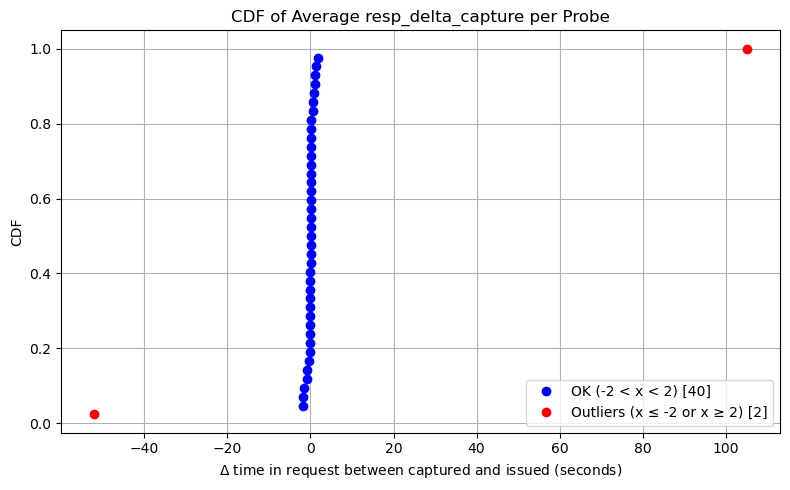

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Group by probe_id and compute the mean resp_delta_capture
avg_resp_delta = df.groupby('probe_id')['resp_delta_capture'].mean().reset_index()
avg_resp_delta.rename(columns={'resp_delta_capture': 'avg_resp_delta_capture'}, inplace=True)

# Step 2: Prepare data for CDF
data = avg_resp_delta['avg_resp_delta_capture'].dropna().values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Define mask: blue if -2 < x < 2, red otherwise
ok_mask = (data_sorted > -2) & (data_sorted < 2)
bad_mask = ~ok_mask

# Count items in each category
ok_count = np.sum(ok_mask)
bad_count = np.sum(bad_mask)

# Step 4: Plot
plt.figure(figsize=(8, 5))

plt.plot(data_sorted[ok_mask], cdf[ok_mask],
         marker='o', linestyle='none', color='blue',
         label=f'OK (-2 < x < 2) [{ok_count}]')

plt.plot(data_sorted[bad_mask], cdf[bad_mask],
         marker='o', linestyle='none', color='red',
         label=f'Outliers (x ≤ -2 or x ≥ 2) [{bad_count}]')

# Labels and legend
plt.xlabel("$\Delta$ time in request between captured and issued (seconds)")
plt.ylabel("CDF")
plt.title("CDF of Average resp_delta_capture per Probe")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


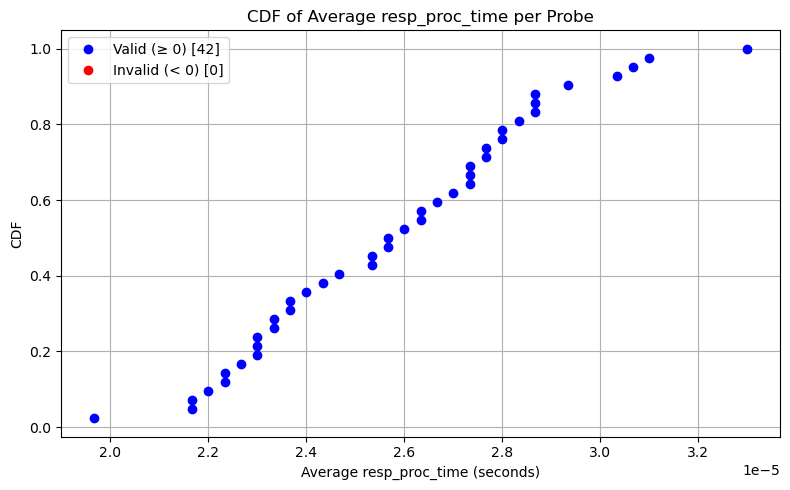

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Group by probe_id and compute the average resp_proc_time
avg_proc_time = df.groupby('probe_id')['resp_proc_time'].mean().reset_index()
avg_proc_time.rename(columns={'resp_proc_time': 'avg_resp_proc_time'}, inplace=True)

# Step 2: Prepare data for CDF
data = avg_proc_time['avg_resp_proc_time'].dropna().values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Create masks for valid (blue) and invalid (red) times
ok_mask = data_sorted >= 0
bad_mask = data_sorted < 0

# Count how many in each category
ok_count = np.sum(ok_mask)
bad_count = np.sum(bad_mask)

# Step 4: Plot
plt.figure(figsize=(8, 5))

# Plot valid (blue)
plt.plot(data_sorted[ok_mask], cdf[ok_mask],
         marker='o', linestyle='none', color='blue',
         label=f'Valid (≥ 0) [{ok_count}]')

# Plot invalid (red)
plt.plot(data_sorted[bad_mask], cdf[bad_mask],
         marker='o', linestyle='none', color='red',
         label=f'Invalid (< 0) [{bad_count}]')

# Labels and title
plt.xlabel("Average resp_proc_time (seconds)")
plt.ylabel("CDF")
plt.title("CDF of Average resp_proc_time per Probe")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
